# Random LUVOIR aperture configurations

And its PSFs

In [5]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import hcipy as hc

import util_pastis as util
from e2e_simulators.luvoir_imaging import LuvoirAPLC

ModuleNotFoundError: No module named 'util_pastis'

In [3]:
# Parameters
nseg = 120    # number of segments
sampling = 4
apodizer_design = 'small'    # 'small', 'medium' or 'large'

In [4]:
# Instantiate LUVOIR object
# This path is specific to the paths used in the LuvoirAPLC class amd within the repository
optics_input = '/Users/pueyo/PythonPackages/PASTIS/LUVOIR_delivery_May2019/'
luvoir = LuvoirAPLC(optics_input, apodizer_design, sampling)

NameError: name 'LuvoirAPLC' is not defined

In [67]:
# Create reference PSF
luvoir.flatten()
psf_unaber, ref = luvoir.calc_psf(ref=True)
norm = ref.max()

In [68]:
plt.style.use('bmh')
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Computer Modern Sans"]
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
plt.rcParams['font.size'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20

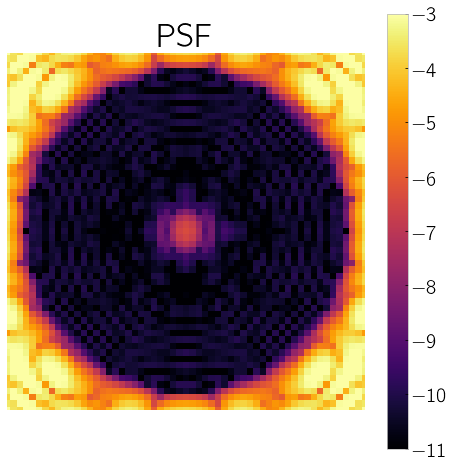

In [69]:
# Plot reference PSF
fig = plt.figure(figsize=(8, 8))
hc.imshow_field(np.log10(psf_unaber/norm), cmap='inferno', vmin = -11, vmax = -3)
plt.axis('off')
plt.title('PSF')
plt.colorbar()

I use the -0.5 to have both negative and positive values, since the random numbers are geenrated in range [0,1]. The `*1e-8` puts them approximately on the nanometer level.

In [74]:
# Create as many random numbers between 0 and 1 as we have segments
rand = (np.random.random(nseg) - 0.5) * 1e-8    # [m]

I flatten the `luvoir` object every time before I use it to make sure I have no residual wavefront error on the segments. The segments are numbered from 1-nb_seg, put python starts the loop numbering with `0`, hence the `seg+1` when adressing the segments in `set_segment()`. That function has the signature: `set_segment(segnum, piston, tip, tilt)` and take entries in meters in radians, in **surface error** hence the `/2` when I apply the piston here.

In this particular case, all plots are intensity, except for the very first plot which is the phase on the aperture.

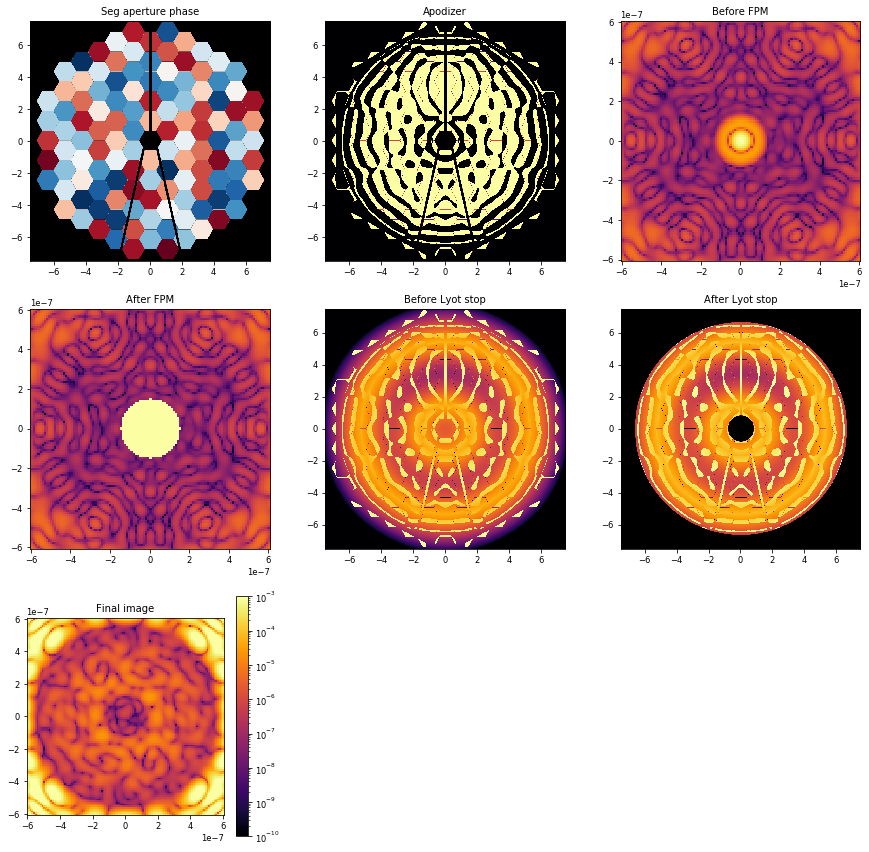

In [29]:
luvoir.flatten()

# loop over all segments
for seg, randval in enumerate(rand):
    #print(seg, randval)
    luvoir.set_segment(seg+1, randval/2, 0, 0)
    
# Calculate the E-field in the final plane and intermediate E-fields
psf, inters = luvoir.calc_psf(ref=False, display_intermediate=True, return_intermediate='efield')

I convert from phase to OPD by doing `phase/wavenumber` in the plotting and I convert to nanometers (I'm just missing the colorbar label - those are usually easier in PowerPoint...)

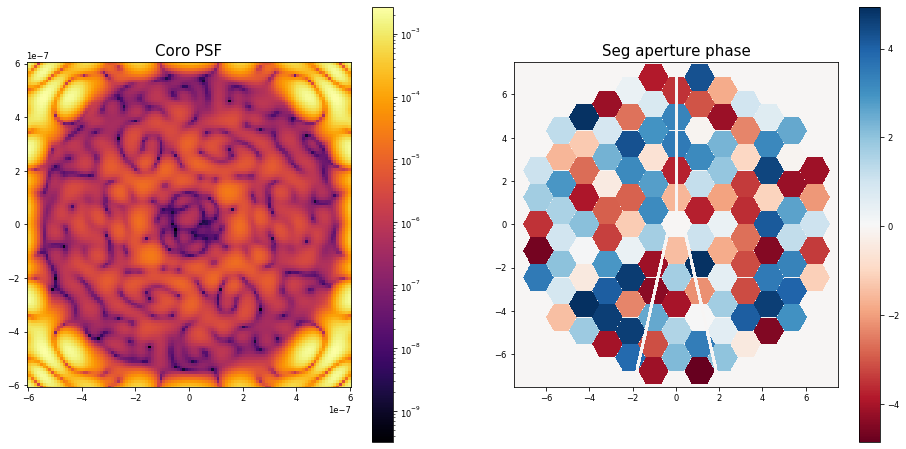

In [43]:
# Display the PSF next to primary wavefront
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
hc.imshow_field(psf.intensity/norm, norm=LogNorm(), cmap='inferno')
plt.title('Coro PSF', size=15)
plt.colorbar()

plt.subplot(1, 2, 2)
hc.imshow_field(inters['seg_mirror'].phase/inters['seg_mirror'].wavenumber/1e-9, cmap='RdBu')
plt.title('Seg aperture phase', size=15)
plt.colorbar()